In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
from scipy import signal
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
import random
import tensorflow as tf
import cv2
from scipy import stats

In [27]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  0


In [2]:
# For reading depth camera
def read_depth_camera(dcamera_path, show_video, n_resize):
    video  = cv2.VideoCapture(dcamera_path)
    ret, frame = video.read()
    
    # Get total # of frame count 
    frame_count = int(video.get(cv2.CAP_PROP_FRAME_COUNT))
        
    frame_height = int(frame.shape[0])
    frame_width = int(frame.shape[1])

    
    depth_frames = np.empty((frame_count, int(frame_height/n_resize), int(frame_width/n_resize)))
    
    count = 0
    while (video.isOpened()):
        ret, frame = video.read()
        
        if ret == True:
            gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            gray_frame = cv2.resize(gray_frame, \
                                    (int(frame_width/n_resize), int(frame_height/n_resize)),\
                                    interpolation = cv2.INTER_AREA)

            depth_frames[count] = gray_frame
            if show_video == True:
                cv2.imshow("Depth", gray_frame)
                if cv2.waitKey(1) & 0xFF == ord('q'):
                    break
            count = count + 1
        else: 
            break
            

    video.release()
    #cv2.destroyAllWindows()
    return depth_frames

In [7]:
def read_output_data(qtm_file_data, theta):
    if theta=='x':
        qtm_data = pd.read_csv(qtm_file_data, usecols = ["Lean Left/Right Angle (deg)"])
    if theta=='y':
        qtm_data = pd.read_csv(qtm_file_data, usecols = ["Lean Forward/Backwards Angle (deg)"])
    if theta=='z':
        qtm_data = pd.read_csv(qtm_file_data, usecols = ["Torso Twist Angle (deg)"])
        
    
    return qtm_data


In [8]:

n_test = 24
date = '11_15_2020'
test_str = '/test' + str(n_test)
#data_dir = r"C:\Users\77bis\Box\CS598 - Final Project\Preliminary Data V4\Test_Subject_Leo" + test_str
data_dir = "/home/asilador/CS598/CS598-FinalProject/Preliminary Data V5/Test_Subject_Leo" + test_str

train_dcamera_path = data_dir + '/depth_processed_leo_test'+str(n_test)+'.avi'
show_video = 0
n_resize = 1
x_train = read_depth_camera(train_dcamera_path, show_video, n_resize)

qtm_file_data_dir = data_dir + '/qtm_processed_leo_test' + str(n_test) + '_' + date + '.txt'
show_qtm_plot = True
theta_interest = 'z'
y_train = read_output_data(qtm_file_data_dir,theta_interest).values
yframe = pd.DataFrame(data=y_train)
xtrainnew = pd.DataFrame(data=np.reshape(x_train, (x_train.shape[0],x_train.shape[1]*x_train.shape[2])))
TheData = pd.concat([xtrainnew,yframe],axis=1)

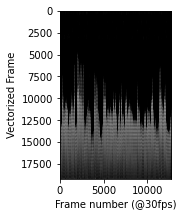

In [21]:
plt.figure(figsize=(2,20))
plt.imshow(xtrainnew.T,cmap='gray')
plt.xlabel('Frame number (@30fps)')
plt.ylabel('Vectorized Frame')
plt.show()

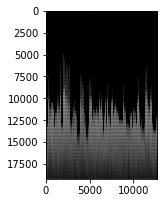

In [19]:
plt.figure(figsize=(2,20))
plt.imshow(xtrain2new.T,cmap='gray')
plt.xlabel('Frame number (@30fps)')
plt.ylabel('Vectorized Frame')
plt.show()

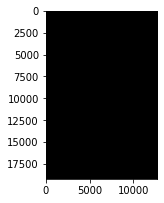

In [20]:
plt.figure(figsize=(2,20))
plt.imshow(xtrainnew.T-xtrain2new.T,cmap='gray')

plt.show()

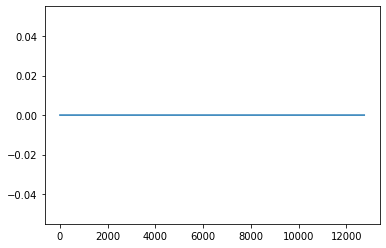

In [17]:
plt.plot(y_train-y_train2)